In [1]:
import pandas as pd
import numpy as np
from yahooquery import Ticker
import matplotlib.pyplot as plt
import scipy.stats as st
from datetime import date
from dateutil.relativedelta import relativedelta

In [2]:
pd.set_option('display.precision', 5)

### Preparação dos dados:

In [3]:
df = Ticker(['SUZB3.SA','ITUB4.SA','BEEF3.SA','^BVSP']).history(start='2020-01-01',end='2023-12-31')

In [4]:
df

open       high        low      close   volume  \
symbol   date                                                              
SUZB3.SA 2020-01-02      40.05      40.82      39.80      40.79  3978400   
         2020-01-03      40.22      41.36      40.20      40.65  4467100   
         2020-01-06      40.36      41.20      40.11      40.58  4304900   
         2020-01-07      40.62      41.33      40.08      41.10  3623900   
         2020-01-08      41.30      43.21      41.01      43.15  9727800   
...                        ...        ...        ...        ...      ...   
^BVSP    2023-12-21  130826.00  132277.00  130822.00  132182.00  8681000   
         2023-12-22  132553.00  133035.00  132094.00  132753.00  8231100   
         2023-12-26  132753.00  133645.00  132753.00  133533.00        0   
         2023-12-27  133523.00  134195.00  133328.00  134194.00  6168200   
         2023-12-28  134194.00  134392.00  133832.00  134185.00  7812700   

                         adjclose  dividends  
symbol   date                                 
SUZB3.SA 2020-01-02      37.57963        0.0  
         2020-01-03      37.45064        0.0  
         2020-01-06      37.38615        0.0  
         2020-01-07      37.86523        0.0  
         2020-01-08      39.75388        0.0  
...                           ...        ...  
^BVSP    2023-12-21  132182.00000        0.0  
         2023-12-22  132753.00000        0.0  
         2023-12-26  133533.00000        0.0  
         2023-12-27  134194.00000        0.0  
         2023-12-28  134185.00000        0.0  

[3972 rows x 7 columns]

In [5]:
df.describe()

,open,high,low,close,volume,adjclose,dividends
count,3972.00000,3972.00000,3972.00000,3972.00000,3.97200e+03,3972.00000,3972.00000
mean,27477.51543,27746.08520,27210.72872,27481.65872,1.57104e+07,27479.78110,0.00271
std,47891.85964,48337.50521,47448.83465,47900.47598,1.46575e+07,47901.55210,0.04337
min,6.37000,6.83000,5.81000,6.60000,0.00000e+00,5.22571,0.00000
25%,19.92000,20.08500,18.98000,19.40500,6.73082e+06,16.72686,0.00000
50%,34.84500,35.06500,34.09000,34.61500,1.02125e+07,31.18869,0.00000
75%,15960.26500,16960.85750,15478.95500,15951.88500,1.87062e+07,15947.21111,0.00000
max,134194.00000,134392.00000,133832.00000,134194.00000,1.60670e+08,134194.00000,1.79478


In [6]:
df.groupby(level='symbol').last()

,open,high,low,close,volume,adjclose,dividends
symbol,,,,,,,
BEEF3.SA,7.51,7.54,7.45,7.47,5368200,7.47000,0.0
ITUB4.SA,33.88,33.97,33.74,33.97,12555300,32.55682,0.0
SUZB3.SA,55.42,55.94,55.42,55.63,2560700,55.63000,0.0
^BVSP,134194.00,134392.00,133832.00,134185.00,7812700,134185.00000,0.0


In [7]:
df['adjclose']

symbol    date      
SUZB3.SA  2020-01-02        37.57963
          2020-01-03        37.45064
          2020-01-06        37.38615
          2020-01-07        37.86523
          2020-01-08        39.75388
                            ...     
^BVSP     2023-12-21    132182.00000
          2023-12-22    132753.00000
          2023-12-26    133533.00000
          2023-12-27    134194.00000
          2023-12-28    134185.00000
Name: adjclose, Length: 3972, dtype: float64

In [8]:
stock_return = np.log(df.groupby(level='symbol')['adjclose'].pct_change().dropna().add(1)).to_frame()
stock_return.rename(columns={'adjclose':'retorno_diario'},inplace=True)

In [9]:
stock_return['retorno_acumulado'] = stock_return.groupby(level='symbol').cumsum()

In [10]:
stock_return

retorno_diario  retorno_acumulado
symbol   date                                         
SUZB3.SA 2020-01-03        -0.00344           -0.00344
         2020-01-06        -0.00172           -0.00516
         2020-01-07         0.01273            0.00757
         2020-01-08         0.04867            0.05625
         2020-01-09        -0.00255            0.05369
...                             ...                ...
^BVSP    2023-12-21         0.01048            0.10865
         2023-12-22         0.00431            0.11296
         2023-12-26         0.00586            0.11882
         2023-12-27         0.00494            0.12376
         2023-12-28        -0.00007            0.12369

[3968 rows x 2 columns]

In [11]:
stock_return.groupby(level='symbol').describe()

retorno_diario                                                        \
                  count     mean      std      min      25%      50%      75%   
symbol                                                                          
BEEF3.SA          992.0 -0.00027  0.02997 -0.20549 -0.01552 -0.00100  0.01503   
ITUB4.SA          992.0  0.00003  0.02198 -0.19802 -0.01168  0.00000  0.01201   
SUZB3.SA          992.0  0.00040  0.02409 -0.17591 -0.01251 -0.00040  0.01333   
^BVSP             992.0  0.00012  0.01793 -0.15993 -0.00799  0.00036  0.00937   

                  retorno_acumulado                                      \
              max             count     mean      std      min      25%   
symbol                                                                    
BEEF3.SA  0.16705             992.0 -0.01813  0.19530 -0.62740 -0.17711   
ITUB4.SA  0.10489             992.0 -0.29065  0.12063 -0.60174 -0.37609   
SUZB3.SA  0.15857             992.0  0.23379  0.17270 -0.50488  0.14355   
^BVSP     0.13022             992.0 -0.08268  0.11335 -0.62339 -0.13339   

                                     
              50%      75%      max  
symbol                               
BEEF3.SA -0.03206  0.12712  0.43670  
ITUB4.SA -0.28672 -0.19864  0.03320  
SUZB3.SA  0.24261  0.34616  0.66329  
^BVSP    -0.06067 -0.00906  0.12376

In [12]:
stock_return.describe()

,retorno_diario,retorno_acumulado
count,3968.00000,3968.00000
mean,0.00007,-0.03942
std,0.02388,0.24260
min,-0.20549,-0.62740
25%,-0.01154,-0.20591
50%,0.00000,-0.06053
75%,0.01222,0.13628
max,0.16705,0.66329


In [13]:
stock_return['tempo'] = stock_return.groupby(level = 'symbol').cumcount().add(1)

In [14]:
benchmark_series = stock_return.loc['^BVSP','retorno_diario']

In [15]:
benchmark_series

date
2020-01-03   -0.00733
2020-01-06   -0.00707
2020-01-07   -0.00185
2020-01-08   -0.00356
2020-01-09   -0.00258
               ...   
2023-12-21    0.01048
2023-12-22    0.00431
2023-12-26    0.00586
2023-12-27    0.00494
2023-12-28   -0.00007
Name: retorno_diario, Length: 992, dtype: float64

### Metricas 

In [16]:
def anualiza_retorno(ret_acc, t):
    return ret_acc * (252 / t)

$$(1+i)^{252/t}$$


$$ \log(1+i)*\frac{252}{t}$$

In [17]:
metricas = stock_return.groupby(level = 'symbol').last()

In [18]:
metricas

,retorno_diario,retorno_acumulado,tempo
symbol,,,
BEEF3.SA,-0.00534,-0.27009,992
ITUB4.SA,0.00265,0.03320,992
SUZB3.SA,0.00144,0.39226,992
^BVSP,-0.00007,0.12369,992


In [19]:
metricas['retorno_anualizado'] = anualiza_retorno(metricas['retorno_acumulado'],metricas['tempo'])

In [20]:
metricas['desvio_padrao'] = stock_return.groupby(level='symbol')['retorno_diario'].std()

In [21]:
# Métricas padrões

In [22]:
metricas

,retorno_diario,retorno_acumulado,tempo,retorno_anualizado,desvio_padrao
symbol,,,,,
BEEF3.SA,-0.00534,-0.27009,992,-0.06861,0.02997
ITUB4.SA,0.00265,0.03320,992,0.00843,0.02198
SUZB3.SA,0.00144,0.39226,992,0.09965,0.02409
^BVSP,-0.00007,0.12369,992,0.03142,0.01793


###  Downside deviation:
 É o desvio padrão do mínimo entre:
 min(0, R - MAR)
 Na qual o MAR é o retorno minimo aceitavel. 
 Aqui vamos utilizar os retornos negativos, então o MAR é 0:
 e vamos escolher entre min(0,R)
 A interpetração é o quanto nossos retornos negativos ( perdas variam), então é o risco da nossas perdas

In [24]:
def downside_deviation(price_series):
    price_series_np = price_series.values
    price_series_np_filter = price_series_np[~np.isnan(np.where(price_series_np<0,price_series_np,np.nan))]
    downside_deviation = np.std(price_series_np_filter)
    return downside_deviation

In [25]:
metricas['downside_deviation'] = stock_return.groupby(level='symbol')['retorno_diario'].apply(downside_deviation)

In [26]:
metricas

,retorno_diario,retorno_acumulado,tempo,retorno_anualizado,desvio_padrao,downside_deviation
symbol,,,,,,
BEEF3.SA,-0.00534,-0.27009,992,-0.06861,0.02997,0.02311
ITUB4.SA,0.00265,0.03320,992,0.00843,0.02198,0.01643
SUZB3.SA,0.00144,0.39226,992,0.09965,0.02409,0.01709
^BVSP,-0.00007,0.12369,992,0.03142,0.01793,0.01548


### Métricas de Risco. 
Sharpe Ratio: compara o quanto é o retorno acima do benchmark ( IBOVESPA nesse caso) para dado nível de risco (desvio padrão). 
Sortino Rate: compara o quanto é o retorno acima do benchmark ( IBOVESPA nesse caso) dado o risco das perdas ( downside deviation)

In [27]:
benchmark = metricas.loc['^BVSP','retorno_anualizado']

In [28]:
metricas['Sharpe_Ratio'] = (metricas['retorno_anualizado'] -  benchmark) / metricas['desvio_padrao']

In [29]:
metricas['Sortino_Ratio'] = (metricas['retorno_anualizado'] -  benchmark) / metricas['downside_deviation']

### Upside Potential Ratio:
 Métrica que avalia o potencial do retorno positivo menos o MAR em relação ao risco de perda
 como MAR é zero nesse caso o Upside Potencial vai ser o retorno dividido pelo downside deviation
 Não compara com o benchmark, aqui é o quanto aceitamos de mínimo, na lógica poderia ser a SELIC (anualizada), se fossemos fazer o MAR para o dowside deviation usariamos a selic diária ou a méida da selic diária no tempo para facilitar a conta
 A melhor maneira seria fazer o min(0, retorno_diario - cdi_diario_do_dia)

In [30]:
metricas['UpsidePotentialRatio'] = metricas['retorno_anualizado']/metricas['downside_deviation']

### Tracking error:
 desvio padrão de quando meu retorno se distancia do benchmark
 Volatilidade do desempenho

In [31]:
metricas['tracking_error'] = (stock_return['retorno_diario'] - stock_return.index.get_level_values('date').map(benchmark_series)).groupby(level='symbol').std()

### Information Ratio
 Quanto ele gera de retorno a mais que o benchmark em comparação a volatilidade de quanto ele se distnacia do benchmark
 Quanto ele gera de retorno para um risco bem ajustado
 Risco Relativo: O IR oferece uma visão sobre como a variação dos retornos do portfólio em relação ao benchmark (Tracking Error) está contribuindo para o desempenho geral. Um alto Tracking Error com um baixo IR pode indicar que o portfólio está assumindo riscos adicionais sem gerar retornos proporcionais.


In [32]:
metricas['Information_Ratio'] = (metricas['retorno_anualizado'] - benchmark)/metricas['tracking_error']

In [33]:
metricas.drop('^BVSP',axis=0,inplace=True)

In [34]:
metricas

,retorno_diario,retorno_acumulado,tempo,retorno_anualizado,desvio_padrao,downside_deviation,Sharpe_Ratio,Sortino_Ratio,UpsidePotentialRatio,tracking_error,Information_Ratio
symbol,,,,,,,,,,,
BEEF3.SA,-0.00534,-0.27009,992,-0.06861,0.02997,0.02311,-3.33829,-4.32849,-2.96887,0.02792,-3.58267
ITUB4.SA,0.00265,0.03320,992,0.00843,0.02198,0.01643,-1.04573,-1.39882,0.51329,0.01454,-1.58086
SUZB3.SA,0.00144,0.39226,992,0.09965,0.02409,0.01709,2.83261,3.99264,5.83146,0.02560,2.66537


### Maximo Drawdown: para um periodo X
 Drawndown é uma métrica de risco que mede o quanto caiu do pico para o vale em um periodo de tempo
  O Maximo Drawdown maior drawdown registrado durante um determinado período de tempo.

In [35]:
def drawdown_maximo(price_serie,anos_offset):
    last_date = price_serie.index.get_level_values(1).max() 
    drawdown_janela = last_date - relativedelta(days=anos_offset*252)
    price_serie_filter = price_serie[price_serie.index.get_level_values('date') > drawdown_janela]
    retornos = price_serie_filter.pct_change().add(1).cumprod().sub(1).add(1).mul(100).fillna(100)
    retornos_maximo = retornos.cummax() 
    drawdown_series = retornos / retornos_maximo - 1
    
    return min(drawdown_series)

In [36]:
drawdown = df.groupby(level='symbol')['adjclose'].apply(drawdown_maximo,anos_offset=1).to_frame().rename(columns={'adjclose':'MDD'})

In [52]:
metricas['drawdown'] = df.groupby(level='symbol')['adjclose'].apply(drawdown_maximo,anos_offset=1).to_frame().rename(columns={'adjclose':'MDD'})

In [49]:
drawdown

,MDD
symbol,
BEEF3.SA,-0.39107
ITUB4.SA,-0.08155
SUZB3.SA,-0.13064
^BVSP,-0.08182


In [39]:
def plot_drawdown(price_serie,anos_offset):
    last_date = price_serie.index.get_level_values(1).max() 
    drawdown_janela = last_date - relativedelta(days=anos_offset*252)
    price_serie_filter = price_serie[price_serie.index.get_level_values('date') > drawdown_janela]
    retornos_np = price_serie_filter.pct_change().add(1).cumprod().sub(1).add(1).mul(100).fillna(100).values
    nome_serie = price_serie.index.get_level_values(0).unique().values[0]
    
    i = np.argmax(np.maximum.accumulate(retornos_np) - retornos_np)
    j = np.argmax(retornos_np[:i])
    
    plt.figure(figsize=(10, 6))
    plt.plot(retornos_np,label=nome_serie)
    plt.plot([i, j], [retornos_np[i], retornos_np[j]], 'o', color='Red', markersize=10)
    plt.xlabel('Time')
    plt.ylabel('Preço')
    plt.legend()
    plt.grid(True)

symbol
BEEF3.SA    None
ITUB4.SA    None
SUZB3.SA    None
^BVSP       None
Name: adjclose, dtype: object

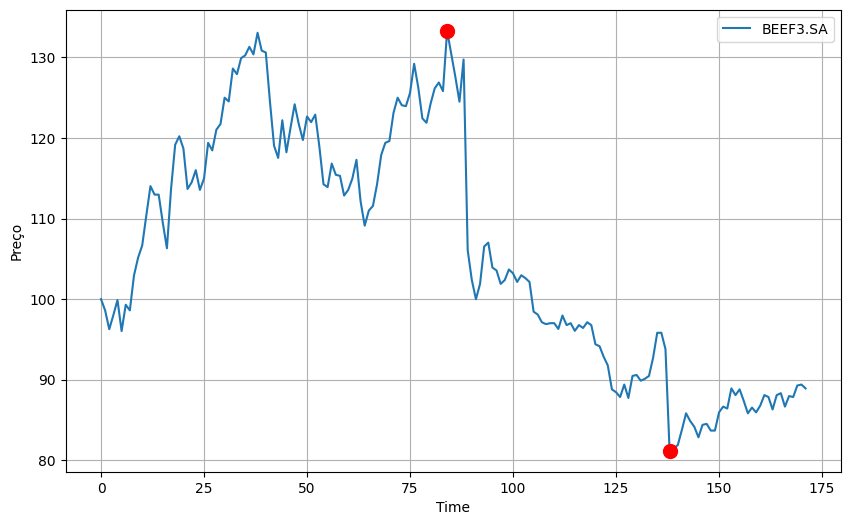

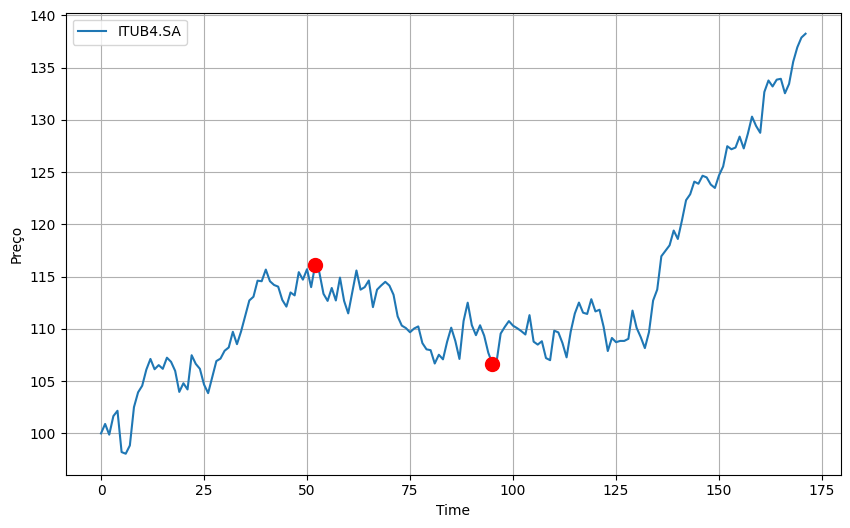

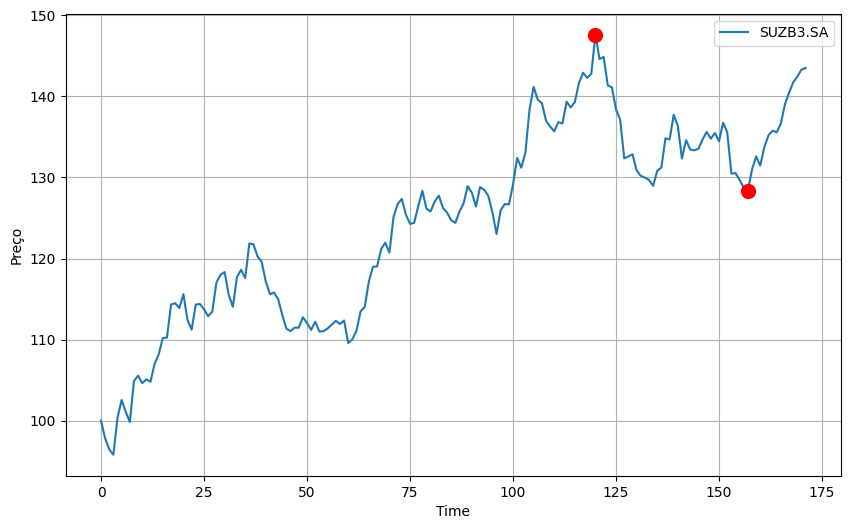

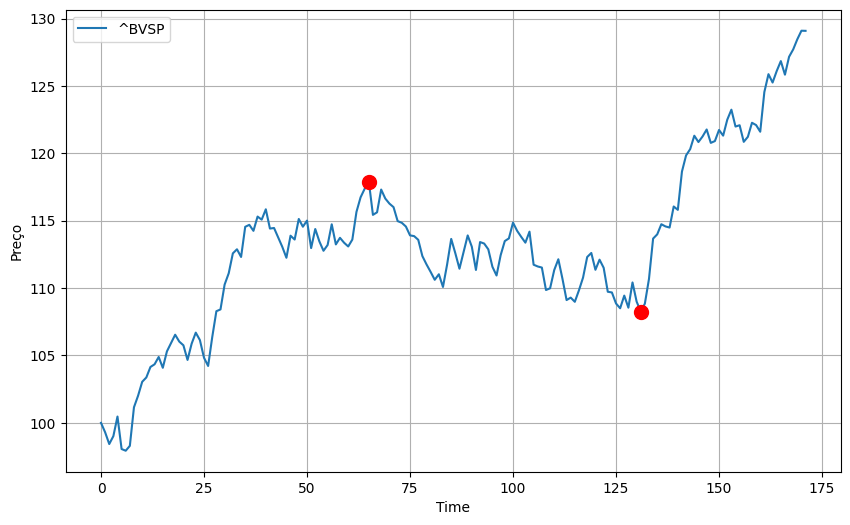

In [51]:
df.groupby(level='symbol')['adjclose'].apply(plot_drawdown,anos_offset=1)

### Value at Risk
 VaR parametrico e o VaR Histórico
 VaR condicional  --> Não iremos abordar aqui
 VaR condicional --> ES, 
Expected Shortfall (ES): É a média das perdas que excedem o VaR para um determinado nível de confiança. Por exemplo, se as perdas que excedem o VaR forem -4%, 5% e -6%, então o ES seria a média dessas perdas (ou seja, -5%).
 Pode ser parametrico ou não
 http://clubedefinancas.com.br/materias/expected-shortfall/

In [41]:
# VaR paramétrico
confiança = st.norm.ppf(.99)
metricas['VaR_Parametrico'] = metricas['desvio_padrao'].mul(confiança).mul(-1)#*np.sqrt(252)

In [42]:
metricas['VaR_Historico'] = stock_return.groupby(level='symbol')['retorno_diario'].quantile(0.01)

In [43]:
del metricas['tempo']
del metricas['retorno_diario']
metricas_formatada = metricas.apply(lambda x: x.map(lambda y: '{:.2f}%'.format(y * 100)))
metricas_formatada.T

symbol,BEEF3.SA,ITUB4.SA,SUZB3.SA
retorno_acumulado,-27.01%,3.32%,39.23%
retorno_anualizado,-6.86%,0.84%,9.96%
desvio_padrao,3.00%,2.20%,2.41%
downside_deviation,2.31%,1.64%,1.71%
Sharpe_Ratio,-333.83%,-104.57%,283.26%
Sortino_Ratio,-432.85%,-139.88%,399.26%
UpsidePotentialRatio,-296.89%,51.33%,583.15%
tracking_error,2.79%,1.45%,2.56%
Information_Ratio,-358.27%,-158.09%,266.54%
drawdown,-54.97%,-23.76%,-32.81%
